In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

In [190]:
train_df = pd.read_csv("/DataWorld/Data_Science/datasets/BlackFridayDataset/train.csv")
test_df = pd.read_csv("/DataWorld/Data_Science/datasets/BlackFridayDataset/test.csv")
sample_submission_df = pd.read_csv("/DataWorld/Data_Science/datasets/BlackFridayDataset/sample_submission.csv")

In [191]:
train_df.shape

(550068, 12)

In [192]:
test_df.shape

(233599, 11)

In [193]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.00000,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.00000,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.00000,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.00000,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.00000,12.00000


In [194]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.00000,14.00000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.00000,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [195]:
sample_submission_df.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [196]:
train_df['source'] = 'train'
test_df['source'] = 'test'

In [197]:
data = pd.concat([train_df, test_df])

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  source                      783667 non-null  object 
dtypes: float64(3),

In [199]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.00000,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.00000,14.00000,15200.00000,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.00000,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.00000,NaN,1057.00000,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.00000,train


In [200]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [201]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667.00000,NaN,NaN,NaN,1003028.99575,1727.26667,1000001.00000,1001519.00000,1003075.00000,1004478.00000,1006040.00000
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667.00000,NaN,NaN,NaN,8.07930,6.52221,0.00000,2.00000,7.00000,14.00000,20.00000
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667.00000,NaN,NaN,NaN,0.40978,0.49179,0.00000,0.00000,0.00000,1.00000,1.00000
Product_Category_1,783667.00000,NaN,NaN,NaN,5.36620,3.87816,1.00000,1.00000,5.00000,8.00000,20.00000
Product_Category_2,537685.00000,NaN,NaN,NaN,9.84451,5.08909,2.00000,5.00000,9.00000,15.00000,18.00000


<AxesSubplot:xlabel='Age'>

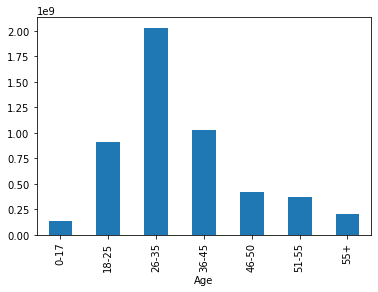

In [202]:
data.groupby('Age').Purchase.sum().plot(kind='bar')

In [203]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [204]:
data['Age'] = data['Age'].map({'0-17':1, '55+':2, '51-55':3, '46-50':4, '18-25':5, '36-45':6, '26-35':7})
data['Product_Category_2']= data['Product_Category_2'].fillna(0)
data['Product_Category_3']= data['Product_Category_3'].fillna(0)

In [205]:
data.groupby('City_Category').Purchase.sum() 
# should be one-hote encoded as there is not linear relation

City_Category
A   1316471661.00000
B   2115533605.00000
C   1663807476.00000
Name: Purchase, dtype: float64

In [206]:
data.groupby('Occupation').Purchase.sum() 
# should be one-hot encoded as there is not linear relation

Occupation
0    635406958.00000
1    424614144.00000
2    238028583.00000
3    162002168.00000
4    666244484.00000
5    113649759.00000
6    188416784.00000
7    557371587.00000
8     14737388.00000
9     54340046.00000
10   115844465.00000
11   106751618.00000
12   305449446.00000
13    71919481.00000
14   259454692.00000
15   118960211.00000
16   238346955.00000
17   393281453.00000
18    60721461.00000
19    73700617.00000
20   296570442.00000
Name: Purchase, dtype: float64

In [207]:
data['Stay_In_Current_City_Years'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2
1          2
2          2
3          2
4         4+
          ..
233594    4+
233595    4+
233596    4+
233597    4+
233598    4+
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object>

In [208]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  source                      783667 non-null  object 
dtypes: float64(3),

In [210]:
data[data['Product_ID'] == 'P00069042']['Product_Category_1'].value_counts()

3    344
Name: Product_Category_1, dtype: int64

### Problems :
1. User_ID : Object type, Lot of unique values. Drop them at last
2. Product_ID : Object type, Lot of unique values.
3. Gender : one-hot-encoding.
4. Age : Label encoding based on the purchase capacity age wise.
5. Occupation : should be one-hot encoded as there is not linear relation
6. City_Category : should be one-hot encoded as there is not linear relation
7. Product_Category_2 : Replace teh NaN with 0 as there is not other relavant replacement.
8. Product_Category_3 : Replace teh NaN with 0 as there is not other relavant replacement.
9. Stay_In_Current_City_Years : features need to be converted to int along with corection 4+ to 4


In [211]:
data_category

,Gender,City_Category
0,F,A
1,F,A
2,F,A
3,F,A
4,M,C
...,...,...
233594,F,B
233595,F,B
233596,F,B
233597,F,C


In [212]:
data_category = data.select_dtypes(exclude=np.number)
data_category

,Product_ID,Gender,City_Category,source
0,P00069042,F,A,train
1,P00248942,F,A,train
2,P00087842,F,A,train
3,P00085442,F,A,train
4,P00285442,M,C,train
...,...,...,...,...
233594,P00118942,F,B,test
233595,P00254642,F,B,test
233596,P00031842,F,B,test
233597,P00124742,F,C,test


In [213]:
data_category = data_category[['Gender', 'City_Category']]
data_category

,Gender,City_Category
0,F,A
1,F,A
2,F,A
3,F,A
4,M,C
...,...,...
233594,F,B
233595,F,B
233596,F,B
233597,F,C


In [214]:
data_category_one_hot = pd.get_dummies(data_category)

In [215]:
data = pd.concat([data,data_category_one_hot], axis=1)

In [216]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,F,1,10,A,2,0,3,0.00000,0.00000,8370.00000,train,1,0,1,0,0
1,1000001,P00248942,F,1,10,A,2,0,1,6.00000,14.00000,15200.00000,train,1,0,1,0,0
2,1000001,P00087842,F,1,10,A,2,0,12,0.00000,0.00000,1422.00000,train,1,0,1,0,0
3,1000001,P00085442,F,1,10,A,2,0,12,14.00000,0.00000,1057.00000,train,1,0,1,0,0
4,1000002,P00285442,M,2,16,C,4,0,8,0.00000,0.00000,7969.00000,train,0,1,0,0,1


In [217]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source',
       'Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [218]:
data.drop(columns= data_category, axis=1, inplace=True)

In [219]:
data

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,1,10,2,0,3,0.00000,0.00000,8370.00000,train,1,0,1,0,0
1,1000001,P00248942,1,10,2,0,1,6.00000,14.00000,15200.00000,train,1,0,1,0,0
2,1000001,P00087842,1,10,2,0,12,0.00000,0.00000,1422.00000,train,1,0,1,0,0
3,1000001,P00085442,1,10,2,0,12,14.00000,0.00000,1057.00000,train,1,0,1,0,0
4,1000002,P00285442,2,16,4,0,8,0.00000,0.00000,7969.00000,train,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,7,15,4,1,8,0.00000,0.00000,NaN,test,1,0,0,1,0
233595,1006036,P00254642,7,15,4,1,5,8.00000,0.00000,NaN,test,1,0,0,1,0
233596,1006036,P00031842,7,15,4,1,1,5.00000,12.00000,NaN,test,1,0,0,1,0
233597,1006037,P00124742,4,1,4,0,10,16.00000,0.00000,NaN,test,1,0,0,0,1


In [220]:
train = data[data['source'] == 'train']
test = data[data['source'] == 'test']

In [221]:
data.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source',
       'Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [222]:
X = train.drop(columns=['User_ID', 'Product_ID', 'source','Purchase'])
y = train['Purchase']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
#X_train = X
#y_train = y

In [224]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [225]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [226]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

4626.374215738822

In [227]:
r2_score(y_train,y_train_pred)

0.15134740531868507

In [228]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

4625.80637626699

In [229]:
r2_score(y_test,y_test_pred)

0.15336225619194144

In [230]:
test.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source',
       'Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [231]:
test.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source',
       'Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [232]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,233599.00000,1003029.35686,1726.50497,1000001.00000,1001527.00000,1003070.00000,1004477.00000,1006040.00000
Age,233599.00000,5.55339,1.62254,1.00000,5.00000,6.00000,7.00000,7.00000
Occupation,233599.00000,8.08541,6.52115,0.00000,2.00000,7.00000,14.00000,20.00000
Stay_In_Current_City_Years,233599.00000,1.85785,1.28726,0.00000,1.00000,2.00000,3.00000,4.00000
Marital_Status,233599.00000,0.41007,0.49185,0.00000,0.00000,0.00000,1.00000,1.00000
Product_Category_1,233599.00000,5.27654,3.73638,1.00000,1.00000,5.00000,8.00000,18.00000
Product_Category_2,233599.00000,6.79924,6.21767,0.00000,0.00000,5.00000,14.00000,18.00000
Product_Category_3,233599.00000,3.85276,6.25663,0.00000,0.00000,0.00000,8.00000,18.00000
Purchase,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_F,233599.00000,0.24755,0.43159,0.00000,0.00000,0.00000,0.00000,1.00000


In [233]:

test_pred = model.predict(test.drop(columns=['User_ID', 'Product_ID', 'source','Purchase']))

In [234]:
test_pred_modified = np.where(test_pred<0,0,test_pred)

In [239]:
test['Purchase'] = test_pred_modified

/tmp/ipykernel_5973/1860126169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Purchase'] = test_pred_modified


In [240]:
output = test[['Purchase','User_ID', 'Product_ID']]

In [241]:
output.to_csv("LR_Regression_BlackFriday-Sales-output/BlackFriday_result1.csv",index=False)

In [242]:
output.head()

,Purchase,User_ID,Product_ID
0,10319.75000,1000004,P00128942
1,10074.50000,1000009,P00113442
2,8451.75000,1000010,P00288442
3,8734.25000,1000010,P00145342
4,10841.50000,1000011,P00053842
